<a href="https://colab.research.google.com/github/KaushikiTiwary/Predicting-Bankruptcy/blob/main/Final_Fintech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!jupyter nbconvert --to script Final_Fintech.ipynb

[NbConvertApp] WARNING | pattern 'Final_Fintech.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 

#Non Bankrupt Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving zvei35wzg5ry6rid.csv to zvei35wzg5ry6rid (1).csv


In [ ]:
import pandas as pd

non_bankrupt_df = pd.read_csv('/content/zvei35wzg5ry6rid.csv')  # change to your file name
non_bankrupt_df.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,act,at,csho,ebit,lct,lt,sale,seq,costat,prcc_f,sic
0,1004,1966-05-31,1965,INDL,C,D,STD,AIR,USD,2.066,2.519,0.420,0.680,0.923,1.091,3.821,1.428,A,NaN,5080
1,1004,1967-05-31,1966,INDL,C,D,STD,AIR,USD,3.007,3.954,0.520,0.575,1.023,1.371,4.654,2.583,A,NaN,5080
2,1004,1968-05-31,1967,INDL,C,D,STD,AIR,USD,3.453,4.880,0.554,0.093,1.082,2.110,4.610,2.771,A,12.624987,5080
3,1004,1969-05-31,1968,INDL,C,D,STD,AIR,USD,7.334,10.402,0.688,0.816,3.835,5.659,9.956,4.744,A,19.749983,5080
4,1004,1970-05-31,1969,INDL,C,D,STD,AIR,USD,8.226,11.584,0.729,0.896,4.576,6.436,15.705,5.148,A,11.124989,5080


In [ ]:
columns_to_keep = [
    'tic', 'fyear', 'act', 'lct', 'at', 'seq',
    'ebit', 'sale', 'lt', 'prcc_f', 'csho', 'sic'
]

In [ ]:
non_bankrupt_df = non_bankrupt_df[columns_to_keep]

In [ ]:
print(non_bankrupt_df.columns)

Index(['tic', 'fyear', 'act', 'lct', 'at', 'seq', 'ebit', 'sale', 'lt',
       'prcc_f', 'csho', 'sic'],
      dtype='object')


In [ ]:
non_bankrupt_df['sic'].unique()

array([5080, 4512, 3564, 6799, 4911, 6141, 3845, 7370, 6351, 3420, 3663,
       6726, 3674, 3559, 1040, 2810, 4513, 4924, 4400, 6798,  100, 5500,
       9997, 6722, 1311, 7510, 2670, 7340, 6311, 6321, 6331, 6512, 8090,
       7372, 2870, 3823, 2836, 3312, 6552, 5150, 1381, 3442, 3533, 2070,
       4213, 5065, 3523, 2820, 3577, 3640, 1000, 2860, 7374, 2844, 3470,
       2111, 3824, 3411, 6020, 2511, 3841, 9995, 3569, 2330, 3677, 4812,
       5731, 3826, 4923, 7200, 6500, 3721, 7363, 3990, 6200, 2013, 2834,
       2911, 4813, 2085, 5661, 3510, 3330, 3661, 3711, 4011, 1623, 7373,
       8741, 3490, 6324, 3670, 2890, 5621,  800, 2086, 4941, 2030, 2082,
       6519, 5122, 2950, 5412, 3531, 2452, 3678, 6792, 3555, 8082, 3452,
       5812, 2840, 7990, 4931, 4832, 3310, 2842, 7812, 3825, 6411, 4841,
       6199, 2000, 6794, 6513, 3851, 3679, 2211, 3728, 3714,  700, 1382,
       5331, 6153, 2780, 8200, 3621, 5190, 3578, 5311, 4888, 2273, 7311,
       7323, 3561, 3827, 3861, 3620, 3651, 2761, 30

In [ ]:
sic_to_industry_custom = {
    # ✅ Healthcare
    8011: 'Healthcare', 8021: 'Healthcare', 8051: 'Healthcare', 8062: 'Healthcare',
    2834: 'Healthcare', 3841: 'Healthcare', 3826: 'Healthcare', 3829: 'Healthcare',
    2833: 'Healthcare', 3845: 'Healthcare',

    # ✅ Finance & Banking
    6020: 'Finance & Banking', 6021: 'Finance & Banking', 6035: 'Finance & Banking',
    6036: 'Finance & Banking', 6111: 'Finance & Banking', 6141: 'Finance & Banking',

    # ✅ Tech
    3571: 'Tech', 3674: 'Tech', 7370: 'Tech', 7371: 'Tech', 7372: 'Tech', 7373: 'Tech',
    7374: 'Tech', 3577: 'Tech', 3572: 'Tech', 5045: 'Tech', 5065: 'Tech',

    # ✅ Manufacturing
    3711: 'Manufacturing', 3721: 'Manufacturing', 3761: 'Manufacturing', 3841: 'Manufacturing',
    3441: 'Manufacturing', 3561: 'Manufacturing', 2833: 'Manufacturing',

    # ✅ Retail
    5411: 'Retail', 5331: 'Retail', 5311: 'Retail', 5999: 'Retail', 5621: 'Retail',

    # ✅ Energy, Oil & Gas
    1311: 'Energy, Oil & Gas', 1389: 'Energy, Oil & Gas', 2911: 'Energy, Oil & Gas',
    4922: 'Energy, Oil & Gas', 4932: 'Energy, Oil & Gas', 4931: 'Energy, Oil & Gas',

    # ✅ Misc/Other
    2836: 'Chemicals', 2040: 'Consumer Products', 2086: 'Consumer Products',
}

In [ ]:
non_bankrupt_df['industry'] = non_bankrupt_df['sic'].map(sic_to_industry_custom)

In [ ]:
non_bankrupt_df['industry'].value_counts(dropna=False)

,count
industry,
NaN,131592
Tech,13964
Finance & Banking,12905
"Energy, Oil & Gas",8224
Healthcare,7316
Chemicals,7238
Manufacturing,2948
Retail,1139
Consumer Products,850


In [ ]:
non_bankrupt_df = non_bankrupt_df.dropna(subset=['industry'])

In [ ]:
non_bankrupt_df.isnull().sum()

,0
tic,4
fyear,0
act,14402
lct,14300
at,1356
seq,2157
ebit,2309
sale,1515
lt,1863
prcc_f,7112


In [ ]:
non_bankrupt_df = non_bankrupt_df.dropna()

In [ ]:
non_bankrupt_df.isnull().sum()

,0
tic,0
fyear,0
act,0
lct,0
at,0
seq,0
ebit,0
sale,0
lt,0
prcc_f,0


In [ ]:
non_bankrupt_df.groupby('industry')['tic'].nunique().sort_values(ascending=False)

,tic
industry,
Tech,945
Chemicals,666
Healthcare,478
"Energy, Oil & Gas",298
Manufacturing,154
Retail,40
Consumer Products,38
Finance & Banking,11


In [ ]:
healthcare_non_bankrupt = non_bankrupt_df[non_bankrupt_df['industry'] == 'Healthcare']

In [ ]:
#healthcare non_bankrupt

# Calculate individual Z-Score components
healthcare_non_bankrupt['X1'] = (healthcare_non_bankrupt['act'] - healthcare_non_bankrupt['lct']) / healthcare_non_bankrupt['at'] # Working Capital / Total Assets
healthcare_non_bankrupt['X2'] = healthcare_non_bankrupt['seq'] / healthcare_non_bankrupt['at']                          # Retained Earnings / Total Assets
healthcare_non_bankrupt['X3'] = healthcare_non_bankrupt['ebit'] / healthcare_non_bankrupt['at']                         # EBIT / Total Assets
healthcare_non_bankrupt['X4'] = (healthcare_non_bankrupt['prcc_f'] * healthcare_non_bankrupt['csho']) / healthcare_non_bankrupt['lt'] # Market Value of Equity / Total Liabilities
healthcare_non_bankrupt['X5'] = healthcare_non_bankrupt['sale'] / healthcare_non_bankrupt['at']                         # Sales / Total Assets
healthcare_non_bankrupt.head()

KeyError: 'industry'

In [ ]:
healthcare_non_bankrupt

,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,sic,industry,X1,X2,X3,X4,X5
374,ABT,1963,102.300,42.965,178.900,123.013,34.938,158.648,55.887,123.999939,4.016,3845,Healthcare,0.331666,0.687608,0.195293,8.910547,0.886797
375,ABT,1964,116.100,45.346,209.400,151.605,43.830,212.586,57.795,47.000000,13.183,3845,Healthcare,0.337889,0.723997,0.209312,10.720668,1.015215
376,ABT,1965,116.700,48.850,223.700,162.675,45.340,236.800,61.025,47.499969,13.184,3845,Healthcare,0.303308,0.727202,0.202682,10.262017,1.058561
377,ABT,1966,128.800,54.185,249.400,179.648,49.086,265.804,69.752,46.000000,13.282,3845,Healthcare,0.299178,0.720321,0.196816,8.759204,1.065774
378,ABT,1967,143.100,60.096,288.900,195.297,52.279,303.341,93.603,47.000000,13.364,3845,Healthcare,0.287310,0.676002,0.180959,6.710340,1.049986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186145,QNRX,2022,13.370,3.528,14.458,7.407,-9.257,0.000,7.051,1.420000,4.847,2834,Healthcare,0.680730,0.512312,-0.640268,0.976137,0.000000
186146,QNRX,2023,11.286,3.581,12.169,5.664,-9.379,0.000,6.505,4.905000,0.987,2834,Healthcare,0.633166,0.465445,-0.770729,0.744233,0.000000
186147,QNRX,2024,14.926,4.181,15.709,9.205,-9.528,0.000,6.504,0.650700,8.948,2834,Healthcare,0.684003,0.585970,-0.606531,0.895213,0.000000
186163,HLN,2022,4890.689,5265.413,41948.594,19677.222,2913.448,13082.804,22119.555,8.000000,4617.287,2834,Healthcare,-0.008933,0.469079,0.069453,1.669938,0.311877


#Bankrupt Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Healthcare.txt to Healthcare.txt
Saving Tech.txt to Tech.txt
Saving Retail.txt to Retail.txt
Saving Manufacturing.txt to Manufacturing.txt
Saving Fin_Banking.txt to Fin_Banking.txt
Saving Energy_Oil_Gas.txt to Energy_Oil_Gas.txt


In [ ]:
!pip install wrds

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.1 MB/s eta 0:00:00


In [ ]:
import wrds

# Connect to WRDS (first time it'll ask for username/password)
db = wrds.Connection()

Enter your WRDS username [root]:kaushiki_tiwary
Enter your password:··········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [ ]:
import pandas as pd

# Load tickers from each uploaded file
tech = pd.read_csv("Tech.txt", sep="\t")
retail = pd.read_csv("Retail.txt", sep="\t")
manufacturing = pd.read_csv("Manufacturing.txt", sep="\t")
finance = pd.read_csv("Fin_Banking.txt", sep="\t")
energy = pd.read_csv("Energy_Oil_Gas.txt", sep="\t")
healthcare = pd.read_csv("Healthcare.txt", sep="\t")

# Add industry column
tech['industry'] = 'Tech'
retail['industry'] = 'Retail'
manufacturing['industry'] = 'Manufacturing'
finance['industry'] = 'Finance & Banking'
energy['industry'] = 'Energy, Oil & Gas'
healthcare['industry'] = 'Healthcare'

# Combine all
bankrupt_companies = pd.concat([tech, retail, manufacturing, finance, energy, healthcare], ignore_index=True)

In [ ]:
# Required Z-score variables
variables = ['tic', 'fyear', 'datadate', 'act', 'lct', 'at', 'seq', 'ebit', 'sale', 'lt', 'prcc_f', 'csho']

# Initialize empty dataframe
all_data = pd.DataFrame()

# Loop through each ticker
for _, row in bankrupt_companies.iterrows():
    ticker = row['tic']
    industry = row['industry']

    query = f"""
        SELECT {', '.join(variables)}
        FROM comp.funda
        WHERE tic = '{ticker}'
        AND indfmt = 'INDL' AND datafmt = 'STD' AND popsrc = 'D' AND consol = 'C'
    """
    try:
        df = db.raw_sql(query)
        df['industry'] = industry
        all_data = pd.concat([all_data, df], ignore_index=True)
    except Exception as e:
        print(f"Error fetching {ticker}: {e}")

<ipython-input-47-292fa6ab5381>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, df], ignore_index=True)
<ipython-input-47-292fa6ab5381>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, df], ignore_index=True)
<ipython-input-47-292fa6ab5381>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining

In [ ]:
all_data.to_csv("industry_wise_bankrupt_financials.csv", index=False)

In [ ]:
# prompt: read the above csv file

import pandas as pd
df = pd.read_csv('industry_wise_bankrupt_financials.csv')
df


,tic,fyear,datadate,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,industry
0,3ATHMQ,1995.0,1995-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tech
1,3ATHMQ,1996.0,1996-12-31,18.315,7.742,33.388,18.317,-25.027,0.676,15.071,NaN,11.855,Tech
2,3ATHMQ,1997.0,1997-12-31,125.440,24.050,323.928,282.407,-58.750,7.437,41.521,25.1250,118.603,Tech
3,3ATHMQ,1998.0,1998-12-31,433.328,43.004,780.631,493.866,-98.040,48.045,286.765,74.2500,123.273,Tech
4,3ATHMQ,1999.0,1999-12-31,630.906,241.883,9104.279,8067.017,-1419.883,336.955,1037.262,42.8750,384.754,Tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9197,ZSANQ,2017.0,2017-12-31,13.393,10.457,18.000,7.048,-28.370,0.000,10.952,0.5200,39.461,Healthcare
9198,ZSANQ,2018.0,2018-12-31,23.360,11.287,35.780,18.710,-34.865,0.000,17.070,2.1200,11.973,Healthcare
9199,ZSANQ,2019.0,2019-12-31,6.813,16.237,37.670,9.392,-37.197,0.000,28.278,1.5200,23.503,Healthcare
9200,ZSANQ,2020.0,2020-12-31,35.716,14.511,72.011,47.515,-32.758,0.224,24.496,0.5271,102.066,Healthcare


In [ ]:
#count of unique comapnies in industries
unique_companies_by_industry = df.groupby('industry')['tic'].nunique()
print(unique_companies_by_industry)

industry
Energy, Oil & Gas      32
Finance & Banking    1193
Healthcare             91
Manufacturing          18
Retail                 27
Tech                   66
Name: tic, dtype: int64


In [ ]:
# Count null (NaN) values in each column
null_counts = df.isnull().sum()
# Show columns that have at least 1 null
null_counts[null_counts > 0].sort_values(ascending=False)

,0
act,6036
lct,5902
ebit,5299
seq,5290
sale,5281
lt,5245
at,5239
prcc_f,637
csho,265
fyear,2


In [ ]:
df.shape

(9202, 13)

In [ ]:
# Check year range across dataset
print("Min year:", df['fyear'].min())
print("Max year:", df['fyear'].max())

# Or count how many years per ticker
df.groupby('tic')['fyear'].nunique().sort_values(ascending=False)

Min year: 1950.0
Max year: 2024.0


,fyear
tic,
GAPTQ,61
MZIAQ,58
FJCC,57
PRETQ,51
LUB,49
...,...
NKEL,1
NTZO,1
NVDW,1


In [ ]:
z_score_columns = ['act', 'lct', 'at', 'seq', 'ebit', 'sale', 'lt', 'prcc_f', 'csho']
df_clean = df.dropna(subset=z_score_columns)

In [ ]:
# 1. Create a lookup of each company's final fiscal year
last_fyear = bankrupt_companies.set_index('tic')['last_fyear'].to_dict()

# 2. Filter out years after bankruptcy
df = df[df.apply(lambda row: row['fyear'] <= last_fyear.get(row['tic'], 9999), axis=1)]
df

,tic,fyear,datadate,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,industry
0,3ATHMQ,1995.0,1995-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tech
1,3ATHMQ,1996.0,1996-12-31,18.315,7.742,33.388,18.317,-25.027,0.676,15.071,NaN,11.855,Tech
2,3ATHMQ,1997.0,1997-12-31,125.440,24.050,323.928,282.407,-58.750,7.437,41.521,25.1250,118.603,Tech
3,3ATHMQ,1998.0,1998-12-31,433.328,43.004,780.631,493.866,-98.040,48.045,286.765,74.2500,123.273,Tech
4,3ATHMQ,1999.0,1999-12-31,630.906,241.883,9104.279,8067.017,-1419.883,336.955,1037.262,42.8750,384.754,Tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9197,ZSANQ,2017.0,2017-12-31,13.393,10.457,18.000,7.048,-28.370,0.000,10.952,0.5200,39.461,Healthcare
9198,ZSANQ,2018.0,2018-12-31,23.360,11.287,35.780,18.710,-34.865,0.000,17.070,2.1200,11.973,Healthcare
9199,ZSANQ,2019.0,2019-12-31,6.813,16.237,37.670,9.392,-37.197,0.000,28.278,1.5200,23.503,Healthcare
9200,ZSANQ,2020.0,2020-12-31,35.716,14.511,72.011,47.515,-32.758,0.224,24.496,0.5271,102.066,Healthcare


In [ ]:
print(bankrupt_companies.columns)

Index(['tic', 'last_fyear', 'industry'], dtype='object')


In [ ]:
#healthcare
healthcare_df = df_clean[df_clean['industry'] == 'Healthcare']

# Calculate individual Z-Score components
healthcare_df['X1'] = (healthcare_df['act'] - healthcare_df['lct']) / healthcare_df['at'] # Working Capital / Total Assets
healthcare_df['X2'] = healthcare_df['seq'] / healthcare_df['at']                          # Retained Earnings / Total Assets
healthcare_df['X3'] = healthcare_df['ebit'] / healthcare_df['at']                         # EBIT / Total Assets
healthcare_df['X4'] = (healthcare_df['prcc_f'] * healthcare_df['csho']) / healthcare_df['lt'] # Market Value of Equity / Total Liabilities
healthcare_df['X5'] = healthcare_df['sale'] / healthcare_df['at']                         # Sales / Total Assets
healthcare_df.head()


<ipython-input-57-503dbcf7b061>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthcare_df['X1'] = (healthcare_df['act'] - healthcare_df['lct']) / healthcare_df['at'] # Working Capital / Total Assets
<ipython-input-57-503dbcf7b061>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthcare_df['X2'] = healthcare_df['seq'] / healthcare_df['at']                          # Retained Earnings / Total Assets
<ipython-input-57-503dbcf7b061>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,tic,fyear,datadate,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,industry,X1,X2,X3,X4,X5
8115,3CYGN,1991.0,1991-12-31,23.997,3.421,32.186,27.341,-8.515,5.057,4.845,22.750,11.568,Healthcare,0.639284,0.849469,-0.264556,54.318266,0.157118
8116,3CYGN,1992.0,1992-12-31,43.404,11.917,52.667,36.153,-15.613,25.643,16.514,12.000,13.651,Healthcare,0.597851,0.686445,-0.296447,9.919583,0.486889
8117,3CYGN,1993.0,1993-12-31,38.153,14.109,46.861,26.243,-11.578,17.477,20.618,11.250,13.851,Healthcare,0.513092,0.560018,-0.247071,7.557656,0.372954
8118,3CYGN,1994.0,1994-12-31,30.642,12.601,38.594,18.117,-8.119,21.270,20.477,6.750,15.573,Healthcare,0.467456,0.469425,-0.210369,5.133455,0.551122
8119,3CYGN,1995.0,1995-12-31,49.826,11.271,57.854,38.252,-13.138,19.006,19.602,22.375,18.223,Healthcare,0.666419,0.661182,-0.227089,20.800920,0.328517


In [ ]:
healthcare_df

,tic,fyear,datadate,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,industry,X1,X2,X3,X4,X5
8115,3CYGN,1991.0,1991-12-31,23.997,3.421,32.186,27.341,-8.515,5.057,4.845,22.7500,11.568,Healthcare,0.639284,0.849469,-0.264556,54.318266,0.157118
8116,3CYGN,1992.0,1992-12-31,43.404,11.917,52.667,36.153,-15.613,25.643,16.514,12.0000,13.651,Healthcare,0.597851,0.686445,-0.296447,9.919583,0.486889
8117,3CYGN,1993.0,1993-12-31,38.153,14.109,46.861,26.243,-11.578,17.477,20.618,11.2500,13.851,Healthcare,0.513092,0.560018,-0.247071,7.557656,0.372954
8118,3CYGN,1994.0,1994-12-31,30.642,12.601,38.594,18.117,-8.119,21.270,20.477,6.7500,15.573,Healthcare,0.467456,0.469425,-0.210369,5.133455,0.551122
8119,3CYGN,1995.0,1995-12-31,49.826,11.271,57.854,38.252,-13.138,19.006,19.602,22.3750,18.223,Healthcare,0.666419,0.661182,-0.227089,20.800920,0.328517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9197,ZSANQ,2017.0,2017-12-31,13.393,10.457,18.000,7.048,-28.370,0.000,10.952,0.5200,39.461,Healthcare,0.163111,0.391556,-1.576111,1.873605,0.000000
9198,ZSANQ,2018.0,2018-12-31,23.360,11.287,35.780,18.710,-34.865,0.000,17.070,2.1200,11.973,Healthcare,0.337423,0.522918,-0.974427,1.486981,0.000000
9199,ZSANQ,2019.0,2019-12-31,6.813,16.237,37.670,9.392,-37.197,0.000,28.278,1.5200,23.503,Healthcare,-0.250173,0.249323,-0.987444,1.263334,0.000000
9200,ZSANQ,2020.0,2020-12-31,35.716,14.511,72.011,47.515,-32.758,0.224,24.496,0.5271,102.066,Healthcare,0.294469,0.659830,-0.454903,2.196236,0.003111


In [ ]:
healthcare_non_bankrupt

,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,sic,industry,X1,X2,X3,X4,X5
374,ABT,1963,102.300,42.965,178.900,123.013,34.938,158.648,55.887,123.999939,4.016,3845,Healthcare,0.331666,0.687608,0.195293,8.910547,0.886797
375,ABT,1964,116.100,45.346,209.400,151.605,43.830,212.586,57.795,47.000000,13.183,3845,Healthcare,0.337889,0.723997,0.209312,10.720668,1.015215
376,ABT,1965,116.700,48.850,223.700,162.675,45.340,236.800,61.025,47.499969,13.184,3845,Healthcare,0.303308,0.727202,0.202682,10.262017,1.058561
377,ABT,1966,128.800,54.185,249.400,179.648,49.086,265.804,69.752,46.000000,13.282,3845,Healthcare,0.299178,0.720321,0.196816,8.759204,1.065774
378,ABT,1967,143.100,60.096,288.900,195.297,52.279,303.341,93.603,47.000000,13.364,3845,Healthcare,0.287310,0.676002,0.180959,6.710340,1.049986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186145,QNRX,2022,13.370,3.528,14.458,7.407,-9.257,0.000,7.051,1.420000,4.847,2834,Healthcare,0.680730,0.512312,-0.640268,0.976137,0.000000
186146,QNRX,2023,11.286,3.581,12.169,5.664,-9.379,0.000,6.505,4.905000,0.987,2834,Healthcare,0.633166,0.465445,-0.770729,0.744233,0.000000
186147,QNRX,2024,14.926,4.181,15.709,9.205,-9.528,0.000,6.504,0.650700,8.948,2834,Healthcare,0.684003,0.585970,-0.606531,0.895213,0.000000
186163,HLN,2022,4890.689,5265.413,41948.594,19677.222,2913.448,13082.804,22119.555,8.000000,4617.287,2834,Healthcare,-0.008933,0.469079,0.069453,1.669938,0.311877


In [ ]:
healthcare_non_bankrupt['tic'].nunique()

478

In [ ]:
healthcare_df['tic'].nunique()

91

#LDA

In [ ]:
# Label data
healthcare_df['label'] = 1  # bankrupt
healthcare_non_bankrupt['label'] = 0  # non-bankrupt

# Combine both
healthcare_full_df = pd.concat([healthcare_df, healthcare_non_bankrupt], ignore_index=True)

<ipython-input-63-317692ef1886>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthcare_df['label'] = 1  # bankrupt
<ipython-input-63-317692ef1886>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthcare_non_bankrupt['label'] = 0  # non-bankrupt


In [ ]:
import numpy as np

# STEP 1: Sample equal number of companies (e.g., 91)
n_companies = 91

bankrupt_companies = healthcare_df['tic'].unique()
non_bankrupt_companies = healthcare_non_bankrupt['tic'].unique()

# STEP 2: Randomly sample 91 companies from non-bankrupt set
np.random.seed(42)
selected_nonbankrupt_tics = np.random.choice(non_bankrupt_companies, size=n_companies, replace=False)

# STEP 3: Filter full data based on those companies
sampled_non_bankrupt_df = healthcare_non_bankrupt[healthcare_non_bankrupt['tic'].isin(selected_nonbankrupt_tics)]
sampled_bankrupt_df = healthcare_df.copy()  # all 91 tic already present

# STEP 4: Combine
balanced_company_df = pd.concat([sampled_bankrupt_df, sampled_non_bankrupt_df], ignore_index=True)

In [ ]:
len(sampled_bankrupt_df['tic'].unique())

91

In [ ]:
len(sampled_non_bankrupt_df['tic'].unique())

91

In [ ]:
balanced_company_df.drop(columns=['sic', 'datadate'])

,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,industry,X1,X2,X3,X4,X5,label
0,3CYGN,1991.0,23.997,3.421,32.186,27.341,-8.515,5.057,4.845,22.750,11.568,Healthcare,0.639284,0.849469,-0.264556,54.318266,0.157118,1
1,3CYGN,1992.0,43.404,11.917,52.667,36.153,-15.613,25.643,16.514,12.000,13.651,Healthcare,0.597851,0.686445,-0.296447,9.919583,0.486889,1
2,3CYGN,1993.0,38.153,14.109,46.861,26.243,-11.578,17.477,20.618,11.250,13.851,Healthcare,0.513092,0.560018,-0.247071,7.557656,0.372954,1
3,3CYGN,1994.0,30.642,12.601,38.594,18.117,-8.119,21.270,20.477,6.750,15.573,Healthcare,0.467456,0.469425,-0.210369,5.133455,0.551122,1
4,3CYGN,1995.0,49.826,11.271,57.854,38.252,-13.138,19.006,19.602,22.375,18.223,Healthcare,0.666419,0.661182,-0.227089,20.800920,0.328517,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,VREOF,2023.0,148.852,179.467,183.264,-16.043,10.579,88.133,199.307,0.240,143.126,Healthcare,-0.167054,-0.087540,0.057725,0.172348,0.480907,0
2173,VREOF,2024.0,230.371,135.467,278.863,55.565,18.067,99.384,223.298,0.560,366.050,Healthcare,0.340325,0.199256,0.064788,0.918002,0.356390,0
2174,SVRE,2022.0,9.513,1.928,9.793,7.552,-8.307,0.339,2.241,1.300,5.556,Healthcare,0.774533,0.771163,-0.848259,3.223025,0.034617,0
2175,SVRE,2023.0,6.722,4.111,7.495,2.936,-9.504,0.755,4.559,0.721,13.916,Healthcare,0.348366,0.391728,-1.268045,2.200798,0.100734,0


#Run the LDA Model

Confusion Matrix:
 [[1268    5]
 [ 902    2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      1.00      0.74      1273
           1       0.29      0.00      0.00       904

    accuracy                           0.58      2177
   macro avg       0.44      0.50      0.37      2177
weighted avg       0.46      0.58      0.43      2177


Accuracy: 0.583371612310519


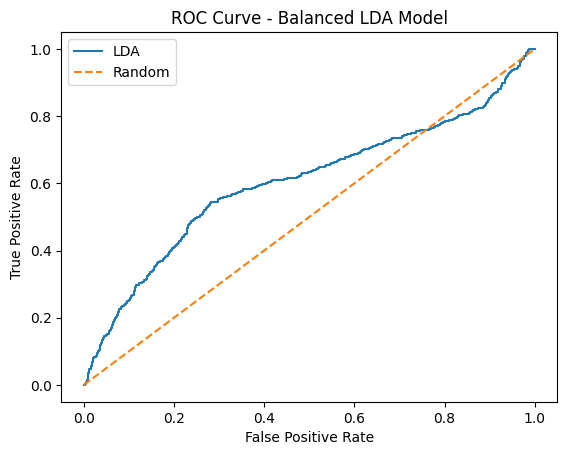

AUC Score: 0.6030246995112931


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Replace any unexpected values
X = balanced_company_df[['X1', 'X2', 'X3', 'X4', 'X5']].replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())
y = balanced_company_df['label'].astype(int)

# Step 2: Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train
lda = LinearDiscriminantAnalysis()
lda.fit(X_scaled, y)

# Step 4: Predict
y_pred = lda.predict(X_scaled)

# Step 5: Evaluate
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))
print("\nAccuracy:", accuracy_score(y, y_pred))

# Step 6: AUC Curve
y_proba = lda.predict_proba(X_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_proba)
plt.plot(fpr, tpr, label="LDA")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Balanced LDA Model")
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y, y_proba))

#Try equal numbers of rows

In [ ]:
sampled_bankrupt_df.drop(columns='datadate')

,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,industry,X1,X2,X3,X4,X5,label
8115,3CYGN,1991.0,23.997,3.421,32.186,27.341,-8.515,5.057,4.845,22.7500,11.568,Healthcare,0.639284,0.849469,-0.264556,54.318266,0.157118,1
8116,3CYGN,1992.0,43.404,11.917,52.667,36.153,-15.613,25.643,16.514,12.0000,13.651,Healthcare,0.597851,0.686445,-0.296447,9.919583,0.486889,1
8117,3CYGN,1993.0,38.153,14.109,46.861,26.243,-11.578,17.477,20.618,11.2500,13.851,Healthcare,0.513092,0.560018,-0.247071,7.557656,0.372954,1
8118,3CYGN,1994.0,30.642,12.601,38.594,18.117,-8.119,21.270,20.477,6.7500,15.573,Healthcare,0.467456,0.469425,-0.210369,5.133455,0.551122,1
8119,3CYGN,1995.0,49.826,11.271,57.854,38.252,-13.138,19.006,19.602,22.3750,18.223,Healthcare,0.666419,0.661182,-0.227089,20.800920,0.328517,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9197,ZSANQ,2017.0,13.393,10.457,18.000,7.048,-28.370,0.000,10.952,0.5200,39.461,Healthcare,0.163111,0.391556,-1.576111,1.873605,0.000000,1
9198,ZSANQ,2018.0,23.360,11.287,35.780,18.710,-34.865,0.000,17.070,2.1200,11.973,Healthcare,0.337423,0.522918,-0.974427,1.486981,0.000000,1
9199,ZSANQ,2019.0,6.813,16.237,37.670,9.392,-37.197,0.000,28.278,1.5200,23.503,Healthcare,-0.250173,0.249323,-0.987444,1.263334,0.000000,1
9200,ZSANQ,2020.0,35.716,14.511,72.011,47.515,-32.758,0.224,24.496,0.5271,102.066,Healthcare,0.294469,0.659830,-0.454903,2.196236,0.003111,1


In [ ]:
sampled_non_bankrupt_df.drop(columns='sic')

,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,industry,X1,X2,X3,X4,X5,label
374,ABT,1963,102.300,42.965,178.900,123.013,34.938,158.648,55.887,123.999939,4.016,Healthcare,0.331666,0.687608,0.195293,8.910547,0.886797,0
375,ABT,1964,116.100,45.346,209.400,151.605,43.830,212.586,57.795,47.000000,13.183,Healthcare,0.337889,0.723997,0.209312,10.720668,1.015215,0
376,ABT,1965,116.700,48.850,223.700,162.675,45.340,236.800,61.025,47.499969,13.184,Healthcare,0.303308,0.727202,0.202682,10.262017,1.058561,0
377,ABT,1966,128.800,54.185,249.400,179.648,49.086,265.804,69.752,46.000000,13.282,Healthcare,0.299178,0.720321,0.196816,8.759204,1.065774,0
378,ABT,1967,143.100,60.096,288.900,195.297,52.279,303.341,93.603,47.000000,13.364,Healthcare,0.287310,0.676002,0.180959,6.710340,1.049986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186014,VREOF,2023,148.852,179.467,183.264,-16.043,10.579,88.133,199.307,0.240000,143.126,Healthcare,-0.167054,-0.087540,0.057725,0.172348,0.480907,0
186015,VREOF,2024,230.371,135.467,278.863,55.565,18.067,99.384,223.298,0.560000,366.050,Healthcare,0.340325,0.199256,0.064788,0.918002,0.356390,0
186051,SVRE,2022,9.513,1.928,9.793,7.552,-8.307,0.339,2.241,1.300000,5.556,Healthcare,0.774533,0.771163,-0.848259,3.223025,0.034617,0
186052,SVRE,2023,6.722,4.111,7.495,2.936,-9.504,0.755,4.559,0.721000,13.916,Healthcare,0.348366,0.391728,-1.268045,2.200798,0.100734,0


#Final Model


In [ ]:
# Step 1: Count how many rows each company has
bankrupt_counts = sampled_bankrupt_df['tic'].value_counts()
non_bankrupt_counts = sampled_non_bankrupt_df['tic'].value_counts()

# Step 2: Create a dictionary {rows: [companies_with_that_row_count]}
from collections import defaultdict

def invert_counts(counts):
    grouped = defaultdict(list)
    for tic, count in counts.items():
        grouped[count].append(tic)
    return grouped

grouped_bankrupt = invert_counts(bankrupt_counts)
grouped_non_bankrupt = invert_counts(non_bankrupt_counts)

# Step 3: Match row counts between both groups
matching_tics = []

for row_count in grouped_bankrupt:
    if row_count in grouped_non_bankrupt:
        # Take equal number of companies from both groups
        n = min(len(grouped_bankrupt[row_count]), len(grouped_non_bankrupt[row_count]))
        bankrupt_subset = grouped_bankrupt[row_count][:n]
        non_bankrupt_subset = grouped_non_bankrupt[row_count][:n]

        matching_tics.extend([(b, nb, row_count) for b, nb in zip(bankrupt_subset, non_bankrupt_subset)])

In [ ]:
# Extract the data for final balanced dataset
bankrupt_final = sampled_bankrupt_df[sampled_bankrupt_df['tic'].isin([b for b, _, _ in matching_tics])]
non_bankrupt_final = sampled_non_bankrupt_df[sampled_non_bankrupt_df['tic'].isin([nb for _, nb, _ in matching_tics])]

# Combine them
balanced_company_df = pd.concat([bankrupt_final, non_bankrupt_final], ignore_index=True)

In [ ]:
balanced_company_df = balanced_company_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Replace inf and NaNs (very important)
X = balanced_company_df[['X1', 'X2', 'X3', 'X4', 'X5']]
y = balanced_company_df['label'].astype(int)

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

<ipython-input-91-df379de92579>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-91-df379de92579>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LinearDiscriminantAnalysis()
lda.fit(X_scaled, y)

LinearDiscriminantAnalysis()

[[282 315]
 [190 407]]
              precision    recall  f1-score   support

           0       0.60      0.47      0.53       597
           1       0.56      0.68      0.62       597

    accuracy                           0.58      1194
   macro avg       0.58      0.58      0.57      1194
weighted avg       0.58      0.58      0.57      1194

Accuracy: 0.5770519262981575
AUC Score: 0.6072545867248021


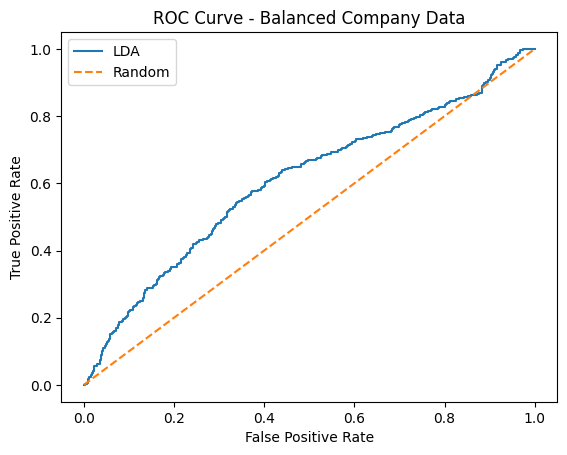

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred = lda.predict(X_scaled)
y_proba = lda.predict_proba(X_scaled)[:, 1]

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))
print("AUC Score:", roc_auc_score(y, y_proba))

# ROC Curve
fpr, tpr, _ = roc_curve(y, y_proba)
plt.plot(fpr, tpr, label='LDA')
plt.plot([0,1], [0,1], linestyle='--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Balanced Company Data")
plt.legend()
plt.show()

In [ ]:
lda_weights = pd.Series(lda.coef_[0], index=X.columns)
print("📊 Altman-style LDA Z-Score Weights:")
print(lda_weights.sort_values(ascending=False))

📊 Altman-style LDA Z-Score Weights:
X1    0.593165
X3    0.011874
X4   -0.116515
X5   -0.205714
X2   -0.440549
dtype: float64


In [ ]:
# Step 1: Get the probabilities for the balanced dataset
balanced_company_df['lda_probability'] = lda.predict_proba(X_scaled)[:, 1]

# Step 2: If needed, merge probabilities back to the original 'df'
# This step depends on your needs and how 'balanced_company_df' relates to 'df'
# One way could be using 'merge'
# df = pd.merge(df, balanced_company_df[['tic', 'fyear', 'lda_probability']], on=['tic', 'fyear'], how='left')

# Step 3: Now calculate percentiles on balanced_company_df
q25 = balanced_company_df['lda_probability'].quantile(0.25)
q50 = balanced_company_df['lda_probability'].quantile(0.50)
q75 = balanced_company_df['lda_probability'].quantile(0.75)

print("Thresholds based on data:")
print(f"🔴 Very High Risk: < {q25:.2f}")
print(f"🟧 High Risk: {q25:.2f} – {q50:.2f}")
print(f"🟨 Medium Risk: {q50:.2f} – {q75:.2f}")
print(f"🟩 Very Low Risk: > {q75:.2f}")

Thresholds based on data:
🔴 Very High Risk: < 0.48
🟧 High Risk: 0.48 – 0.51
🟨 Medium Risk: 0.51 – 0.54
🟩 Very Low Risk: > 0.54


In [ ]:
from sklearn.metrics import roc_curve

# Get predicted probabilities
y_proba = lda.predict_proba(X_scaled)[:, 1]

# Compute FPR, TPR, Thresholds
fpr, tpr, thresholds = roc_curve(y, y_proba)

# Find the threshold where (TPR - FPR) is maximized (Youden's J)
j_scores = tpr - fpr
best_index = j_scores.argmax()
best_threshold = thresholds[best_index]

print(f"📌 Best Threshold (Youden’s J): {best_threshold:.4f}")

📌 Best Threshold (Youden’s J): 0.5207


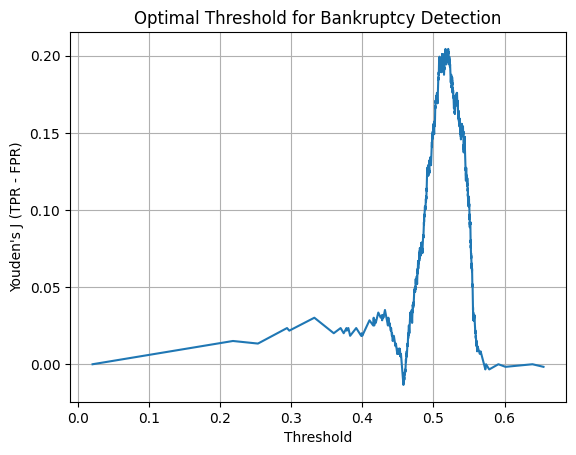

In [ ]:
import matplotlib.pyplot as plt

plt.plot(thresholds, tpr - fpr)
plt.xlabel("Threshold")
plt.ylabel("Youden's J (TPR - FPR)")
plt.title("Optimal Threshold for Bankruptcy Detection")
plt.grid(True)
plt.show()

In [ ]:
# # Use Youden threshold for strict flag
# df['is_bankrupt_pred'] = (df['lda_probability'] < 0.5207).astype(int)

# # Use quantiles for colorful dashboards
# df['risk_zone'] = df['lda_probability'].apply(risk_zone_function)

#Companies check

In [ ]:
# Get all unique companies used in sampled_non_bankrupt_df
used_companies = sampled_non_bankrupt_df['tic'].unique()

# Filter a company from healthcare_non_bankrupt not used in sampled set
unseen_company_df = healthcare_non_bankrupt[~healthcare_non_bankrupt['tic'].isin(used_companies)]

# Pick one company for demo
new_company = unseen_company_df[unseen_company_df['tic'] == unseen_company_df['tic'].unique()[0]]

In [ ]:
# Select relevant features
features = ['X1', 'X2', 'X3', 'X4', 'X5']
new_X = new_company[features]

# Handle any NaNs or Infs (just like training data)
new_X.replace([np.inf, -np.inf], np.nan, inplace=True)
new_X.fillna(X.mean(), inplace=True)  # Use mean from original training X

<ipython-input-108-d15c856ddb4b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-108-d15c856ddb4b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_X.fillna(X.mean(), inplace=True)  # Use mean from original training X


In [ ]:
# Use the scaler fitted on training data
new_X_scaled = scaler.transform(new_X)

# Predict probability (Z-score)
new_company['lda_probability'] = lda.predict_proba(new_X_scaled)[:, 1]

<ipython-input-109-9e22785529e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_company['lda_probability'] = lda.predict_proba(new_X_scaled)[:, 1]


In [ ]:
def risk_zone_function(prob):
    if prob > 0.54:
        return "🟩 Very Low Risk"
    elif prob > 0.51:
        return "🟨 Medium Risk"
    elif prob > 0.48:
        return "🟧 High Risk"
    else:
        return "🔴 Very High Risk"

In [ ]:
# Using your already defined function
new_company['risk_zone'] = new_company['lda_probability'].apply(risk_zone_function)

<ipython-input-112-93bf1dd0fd5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_company['risk_zone'] = new_company['lda_probability'].apply(risk_zone_function)


In [ ]:
print(new_company[['tic', 'fyear', 'lda_probability', 'risk_zone']])

      tic  fyear  lda_probability         risk_zone
5321  BIO   1974         0.426505  🔴 Very High Risk
5322  BIO   1975         0.406718  🔴 Very High Risk
5323  BIO   1976         0.425472  🔴 Very High Risk
5324  BIO   1977         0.428990  🔴 Very High Risk
5325  BIO   1978         0.449006  🔴 Very High Risk
5326  BIO   1979         0.429779  🔴 Very High Risk
5327  BIO   1980         0.458975  🔴 Very High Risk
5328  BIO   1981         0.457799  🔴 Very High Risk
5329  BIO   1982         0.462686  🔴 Very High Risk
5330  BIO   1983         0.471908  🔴 Very High Risk
5331  BIO   1984         0.457435  🔴 Very High Risk
5332  BIO   1985         0.442246  🔴 Very High Risk
5333  BIO   1986         0.452834  🔴 Very High Risk
5334  BIO   1987         0.456704  🔴 Very High Risk
5335  BIO   1988         0.451402  🔴 Very High Risk
5336  BIO   1989         0.450343  🔴 Very High Risk
5337  BIO   1990         0.446079  🔴 Very High Risk
5338  BIO   1991         0.455471  🔴 Very High Risk
5339  BIO   

In [ ]:
# Step 1: Get all used company tickers from your sampled_non_bankrupt_df
used_companies = sampled_non_bankrupt_df['tic'].unique()

# Step 2: Filter companies not used in training (non-bankrupt unseen)
unseen_companies_df = healthcare_non_bankrupt[~healthcare_non_bankrupt['tic'].isin(used_companies)]

# Step 3: Select only 2024 data
unseen_2024_df = unseen_companies_df[unseen_companies_df['fyear'] == 2024]

# ✅ Optional: Drop NaNs or fix them
unseen_2024_df = unseen_2024_df.dropna(subset=['X1', 'X2', 'X3', 'X4', 'X5'])

# Step 4: Extract features
new_X = unseen_2024_df[['X1', 'X2', 'X3', 'X4', 'X5']]

# Step 5: Handle infs and NaNs just in case
new_X.replace([np.inf, -np.inf], np.nan, inplace=True)
new_X.fillna(X.mean(), inplace=True)  # X is your training feature data

# Step 6: Scale features using trained scaler
new_X_scaled = scaler.transform(new_X)

# Step 7: Predict probability
unseen_2024_df['lda_probability'] = lda.predict_proba(new_X_scaled)[:, 1]

# Step 8: Label zones based on your custom function
unseen_2024_df['risk_zone'] = unseen_2024_df['lda_probability'].apply(risk_zone_function)

# Step 9: Show results
print(unseen_2024_df[['tic', 'fyear', 'lda_probability', 'risk_zone']])

         tic  fyear  lda_probability         risk_zone
5371     BIO   2024         0.521813     🟨 Medium Risk
6002     BMY   2024         0.506180       🟧 High Risk
11510   GTBP   2024         0.542555   🟩 Very Low Risk
11715    DHR   2024         0.513110     🟨 Medium Risk
13795   DYNT   2024         0.445097  🔴 Very High Risk
...      ...    ...              ...               ...
185208  IXHL   2024         0.552230   🟩 Very Low Risk
185543  ICCM   2024         0.528138     🟨 Medium Risk
186127  MDAI   2024         0.355769  🔴 Very High Risk
186139  CMND   2024         0.551441   🟩 Very Low Risk
186147  QNRX   2024         0.556641   🟩 Very Low Risk

[226 rows x 4 columns]


<ipython-input-114-d060e337a769>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-114-d060e337a769>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_X.fillna(X.mean(), inplace=True)  # X is your training feature data


In [ ]:
# 'pfe_in_sampled' in sampled_non_bankrupt_df['tic'].unique()
# # OR, more explicitly:
"JNJ" in sampled_non_bankrupt_df['tic'].unique()

False

In [ ]:
# Step 1: Pull JNJ's 2024 data from the non-bankrupt pool
jnj_2024 = healthcare_non_bankrupt[
    (healthcare_non_bankrupt['tic'] == 'JNJ') &
    (healthcare_non_bankrupt['fyear'] == 2024)
].copy()

# Step 2: Ensure no NaNs in financial ratios
jnj_2024 = jnj_2024.dropna(subset=['X1', 'X2', 'X3', 'X4', 'X5'])

# Step 3: Feature extraction + cleaning
jnj_X = jnj_2024[['X1', 'X2', 'X3', 'X4', 'X5']]
jnj_X.replace([np.inf, -np.inf], np.nan, inplace=True)
jnj_X.fillna(X.mean(), inplace=True)

# Step 4: Scale using the same scaler from training
jnj_X_scaled = scaler.transform(jnj_X)

# Step 5: Predict LDA probability
jnj_2024['lda_probability'] = lda.predict_proba(jnj_X_scaled)[:, 1]

# Step 6: Assign risk zone
jnj_2024['risk_zone'] = jnj_2024['lda_probability'].apply(risk_zone_function)

# Step 7: Show result
print(jnj_2024[['tic', 'fyear', 'lda_probability', 'risk_zone']])

       tic  fyear  lda_probability    risk_zone
23396  JNJ   2024         0.503336  🟧 High Risk


<ipython-input-117-b8d36764de82>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jnj_X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-117-b8d36764de82>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jnj_X.fillna(X.mean(), inplace=True)
